In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def load_data():
    # 从文件导入数据
    datafile = 'housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]

    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [7]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                 format(epoch_id, iter_id, loss))
        
        return losses


Epoch   0 / iter   0, loss = 9.2902
Epoch   0 / iter   1, loss = 4.6070
Epoch   0 / iter   2, loss = 1.9129
Epoch   0 / iter   3, loss = 0.8296
Epoch   0 / iter   4, loss = 0.8291
Epoch   1 / iter   0, loss = 0.2509
Epoch   1 / iter   1, loss = 0.2588
Epoch   1 / iter   2, loss = 0.2809
Epoch   1 / iter   3, loss = 0.2724
Epoch   1 / iter   4, loss = 0.3719
Epoch   2 / iter   0, loss = 0.3004
Epoch   2 / iter   1, loss = 0.2199
Epoch   2 / iter   2, loss = 0.2306
Epoch   2 / iter   3, loss = 0.2134
Epoch   2 / iter   4, loss = 0.3363
Epoch   3 / iter   0, loss = 0.3362
Epoch   3 / iter   1, loss = 0.1657
Epoch   3 / iter   2, loss = 0.2548
Epoch   3 / iter   3, loss = 0.1776
Epoch   3 / iter   4, loss = 0.2557
Epoch   4 / iter   0, loss = 0.1981
Epoch   4 / iter   1, loss = 0.2269
Epoch   4 / iter   2, loss = 0.1947
Epoch   4 / iter   3, loss = 0.2337
Epoch   4 / iter   4, loss = 0.1374
Epoch   5 / iter   0, loss = 0.1884
Epoch   5 / iter   1, loss = 0.2109
Epoch   5 / iter   2, loss =

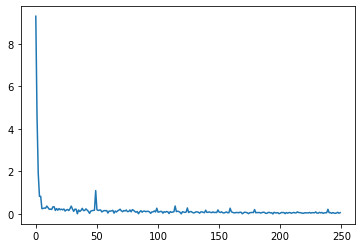

In [8]:

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()